# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [11]:
import pandas as pd
import plotly.express as px
import numpy as np
import yfinance as yf
from plotly import graph_objects
from pandas_datareader import data as pdr



In [24]:
%%time
ativos = ['NVDA' , 'AMD' , 'INTC']
data_ini = ('2022-01-01')

dados = yf.download(ativos , start = data_ini)

[*********************100%***********************]  3 of 3 completed

CPU times: total: 15.6 ms
Wall time: 589 ms


In [23]:
dados.to_csv('../dados.csv')

In [6]:
dados

Price                       Adj Close                              Close  \
Ticker                            AMD       INTC        NVDA         AMD   
Date                                                                       
2022-01-03 00:00:00+00:00  150.240005  49.350491   30.073059  150.240005   
2022-01-04 00:00:00+00:00  144.419998  49.285561   29.243385  144.419998   
2022-01-05 00:00:00+00:00  136.149994  49.962608   27.560066  136.149994   
2022-01-06 00:00:00+00:00  136.229996  50.092461   28.133156  136.229996   
2022-01-07 00:00:00+00:00  132.000000  49.563805   27.203638  132.000000   
...                               ...        ...         ...         ...   
2024-09-17 00:00:00+00:00  150.820007  21.469999  115.589996  150.820007   
2024-09-18 00:00:00+00:00  148.289993  20.770000  113.370003  148.289993   
2024-09-19 00:00:00+00:00  156.740005  21.139999  117.870003  156.740005   
2024-09-20 00:00:00+00:00  155.949997  21.840000  116.000000  155.949997   
2024-09-23 00:00:00+00:00  156.750000  22.559999  116.260002  156.750000   

Price                                                   High             \
Ticker                          INTC        NVDA         AMD       INTC   
Date                                                                      
2022-01-03 00:00:00+00:00  53.209999   30.121000  151.649994  53.230000   
2022-01-04 00:00:00+00:00  53.139999   29.290001  152.419998  53.939999   
2022-01-05 00:00:00+00:00  53.869999   27.604000  143.759995  56.169998   
2022-01-06 00:00:00+00:00  54.009998   28.177999  138.000000  54.669998   
2022-01-07 00:00:00+00:00  53.439999   27.247000  137.440002  54.389999   
...                              ...         ...         ...        ...   
2024-09-17 00:00:00+00:00  21.469999  115.589996  154.039993  22.580000   
2024-09-18 00:00:00+00:00  20.770000  113.370003  152.820007  21.740000   
2024-09-19 00:00:00+00:00  21.139999  117.870003  159.250000  21.690001   
2024-09-20 00:00:00+00:00  21.840000  116.000000  157.449997  23.139999   
2024-09-23 00:00:00+00:00  22.559999  116.260002  157.190002  22.820000   

Price                                         Low                         \
Ticker                           NVDA         AMD       INTC        NVDA   
Date                                                                       
2022-01-03 00:00:00+00:00   30.711000  145.020004  51.599998   29.785000   
2022-01-04 00:00:00+00:00   30.468000  140.699997  52.650002   28.349001   
2022-01-05 00:00:00+00:00   29.416000  135.289993  53.830002   27.533001   
2022-01-06 00:00:00+00:00   28.438000  131.770004  53.419998   27.065001   
2022-01-07 00:00:00+00:00   28.422001  131.130005  53.150002   27.056999   
...                               ...         ...        ...         ...   
2024-09-17 00:00:00+00:00  118.800003  149.229996  21.240000  114.830002   
2024-09-18 00:00:00+00:00  117.699997  148.009995  20.719999  113.220001   
2024-09-19 00:00:00+00:00  119.660004  152.770004  21.030001  117.250000   
2024-09-20 00:00:00+00:00  118.620003  152.470001  20.350000  115.389999   
2024-09-23 00:00:00+00:00  116.989998  154.970001  22.030001  114.860001   

Price                            Open                           Volume  \
Ticker                            AMD       INTC        NVDA       AMD   
Date                                                                     
2022-01-03 00:00:00+00:00  145.139999  51.650002   29.815001  59396600   
2022-01-04 00:00:00+00:00  151.009995  53.570000   30.277000  80200500   
2022-01-05 00:00:00+00:00  142.820007  54.189999   28.948999  65403200   
2022-01-06 00:00:00+00:00  136.190002  54.610001   27.639999  64802900   
2022-01-07 00:00:00+00:00  136.279999  54.189999   28.141001  58441100   
...                               ...        ...         ...       ...   
2024-09-17 00:00:00+00:00  153.550003  21.709999  118.169998  29889000   
2024-09-18 00:00:00+00:00  150.899994  21.360001  115.889999  26320100   
2024-

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [146]:
dados_vert = dados['Adj Close'].stack().reset_index()
dados_vert.columns = ['data' , 'ativo' , 'valor']
dados_vert['data'] = pd.to_datetime(dados_vert['data']).dt.date
dados_vert['amplitude'] = (dados['High'] - dados['Low']).stack().reset_index()[0]
dados_vert.head()

,data,ativo,valor,amplitude
0,2022-01-03,AMD,150.240005,6.629990
1,2022-01-03,INTC,49.350483,1.630001
2,2022-01-03,NVDA,30.073061,0.926001
3,2022-01-04,AMD,144.419998,11.720001
4,2022-01-04,INTC,49.285564,1.289997


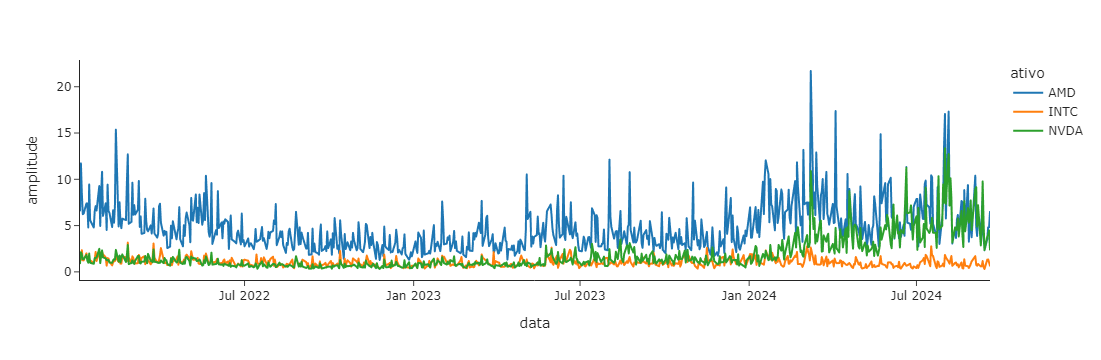

In [147]:
fig = px.line(dados_vert , x = 'data' , y = 'amplitude' , color = 'ativo' , template = 'simple_white')
fig.show()

A AMD Teve maior volatilidade.